# 1. 라이브러리 불러오기

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 2. 데이터 불러오기

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

# 3. X, y 분리

In [3]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.15, random_state = 2023)

# 4. 머신러닝 학습

In [5]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_val)

86.35063888484494


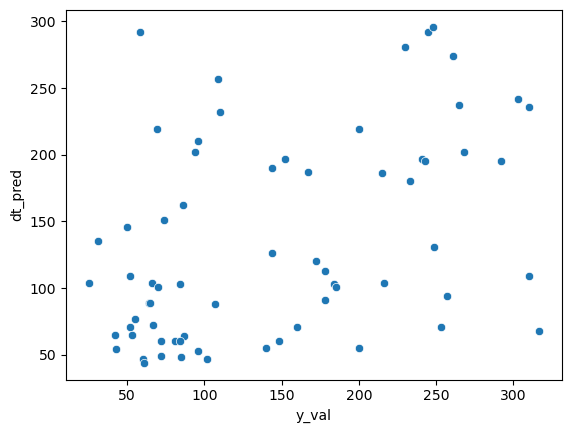

In [6]:
from sklearn.metrics import mean_squared_error as MSE
print(MSE(y_val, dt_pred)**(0.5))

sns.scatterplot(x = y_val, y = dt_pred)
plt.ylabel('dt_pred')
plt.xlabel('y_val')
plt.show()

# 5. 딥러닝 학습

In [7]:
# 1. 세션클리어
clear_session()

# 2. 모델 선언
model = Sequential()

# 3. 모델 블록 조립
model.add(Dense(units = 64, activation = 'relu', input_shape = (10,)))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))

# 4. 모델 컴파일
model.compile(loss = 'mse',
              metrics=['mae'],
              optimizer = 'adam')

# 5. 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1)

mc = ModelCheckpoint(filepath = './best_model.h5', 
                     monitor='val_loss', 
                     save_best_only= True, 
                     save_weights_only= False, 
                     verbose = 1)

In [9]:
history = model.fit(x_train, y_train, 
          epochs = 1000, batch_size = 128,
          validation_split=0.2, callbacks=[es, mc], verbose = 1)

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 29726.6914 - mae: 153.1317
Epoch 1: val_loss improved from inf to 30001.53320, saving model to .\best_model.h5
3/3 [==============================] - 1s 129ms/step - loss: 28984.9805 - mae: 151.6853 - val_loss: 30001.5332 - val_mae: 159.8628
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 29308.9844 - mae: 150.0340
Epoch 2: val_loss improved from 30001.53320 to 29988.42383, saving model to .\best_model.h5
3/3 [==============================] - 0s 34ms/step - loss: 28973.3340 - mae: 151.6478 - val_loss: 29988.4238 - val_mae: 159.8221
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 27158.5312 - mae: 145.7713
Epoch 3: val_loss improved from 29988.42383 to 29974.07031, saving model to .\best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 28960.3340 - mae: 151.6061 - val_loss: 29974.0703 - val_mae: 159.7776
Epoch 4/1000
1/3 [=========>....................] - ETA:

Epoch 27/1000
1/3 [=========>....................] - ETA: 0s - loss: 29807.0273 - mae: 152.8310
Epoch 27: val_loss improved from 28546.14258 to 28399.38281, saving model to .\best_model.h5
3/3 [==============================] - 0s 31ms/step - loss: 27541.0273 - mae: 147.0569 - val_loss: 28399.3828 - val_mae: 154.9407
Epoch 28/1000
1/3 [=========>....................] - ETA: 0s - loss: 30994.9238 - mae: 154.8561
Epoch 28: val_loss improved from 28399.38281 to 28243.00000, saving model to .\best_model.h5
3/3 [==============================] - 0s 33ms/step - loss: 27398.9863 - mae: 146.5951 - val_loss: 28243.0000 - val_mae: 154.4555
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 25913.2188 - mae: 142.5570
Epoch 29: val_loss improved from 28243.00000 to 28077.10352, saving model to .\best_model.h5
3/3 [==============================] - 0s 36ms/step - loss: 27244.4492 - mae: 146.1017 - val_loss: 28077.1035 - val_mae: 153.9391
Epoch 30/1000
1/3 [=========>..............

Epoch 53/1000
1/3 [=========>....................] - ETA: 0s - loss: 22790.4082 - mae: 129.6762
Epoch 53: val_loss improved from 21043.52148 to 20603.03125, saving model to .\best_model.h5
3/3 [==============================] - 0s 40ms/step - loss: 20321.5820 - mae: 121.7672 - val_loss: 20603.0312 - val_mae: 128.7215
Epoch 54/1000
1/3 [=========>....................] - ETA: 0s - loss: 23274.2480 - mae: 133.6726
Epoch 54: val_loss improved from 20603.03125 to 20149.58594, saving model to .\best_model.h5
3/3 [==============================] - 0s 30ms/step - loss: 19912.2148 - mae: 120.1428 - val_loss: 20149.5859 - val_mae: 127.0365
Epoch 55/1000
1/3 [=========>....................] - ETA: 0s - loss: 17782.5293 - mae: 113.3533
Epoch 55: val_loss improved from 20149.58594 to 19692.93164, saving model to .\best_model.h5
3/3 [==============================] - 0s 30ms/step - loss: 19464.1797 - mae: 118.4478 - val_loss: 19692.9316 - val_mae: 125.3150
Epoch 56/1000
1/3 [=========>..............

Epoch 79/1000
1/3 [=========>....................] - ETA: 0s - loss: 8358.0186 - mae: 69.7668
Epoch 79: val_loss improved from 8715.12793 to 8325.23047, saving model to .\best_model.h5
3/3 [==============================] - 0s 33ms/step - loss: 8796.2666 - mae: 71.4330 - val_loss: 8325.2305 - val_mae: 73.8568
Epoch 80/1000
1/3 [=========>....................] - ETA: 0s - loss: 7441.8364 - mae: 65.7086
Epoch 80: val_loss improved from 8325.23047 to 7944.28564, saving model to .\best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 8440.1162 - mae: 69.8426 - val_loss: 7944.2856 - val_mae: 71.8226
Epoch 81/1000
1/3 [=========>....................] - ETA: 0s - loss: 7985.3579 - mae: 66.9888
Epoch 81: val_loss improved from 7944.28564 to 7573.33154, saving model to .\best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 8098.9673 - mae: 68.2859 - val_loss: 7573.3315 - val_mae: 69.8758
Epoch 82/1000
1/3 [=========>....................] - ETA: 0s - loss

3/3 [==============================] - 0s 34ms/step - loss: 4076.2920 - mae: 52.5658 - val_loss: 3140.7703 - val_mae: 47.0482
Epoch 106/1000
1/3 [=========>....................] - ETA: 0s - loss: 3518.8950 - mae: 49.4519
Epoch 106: val_loss improved from 3140.77026 to 3094.63281, saving model to .\best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 4034.3484 - mae: 52.4146 - val_loss: 3094.6328 - val_mae: 46.7946
Epoch 107/1000
1/3 [=========>....................] - ETA: 0s - loss: 4507.1982 - mae: 55.8529
Epoch 107: val_loss improved from 3094.63281 to 3052.35083, saving model to .\best_model.h5
3/3 [==============================] - 0s 33ms/step - loss: 4006.1982 - mae: 52.3383 - val_loss: 3052.3508 - val_mae: 46.5473
Epoch 108/1000
1/3 [=========>....................] - ETA: 0s - loss: 3737.3789 - mae: 51.7158
Epoch 108: val_loss improved from 3052.35083 to 3017.95044, saving model to .\best_model.h5
3/3 [==============================] - 0s 33ms/step - loss: 3

Epoch 132/1000
1/3 [=========>....................] - ETA: 0s - loss: 3840.5100 - mae: 53.1574
Epoch 132: val_loss improved from 2723.45117 to 2717.43481, saving model to .\best_model.h5
3/3 [==============================] - 0s 30ms/step - loss: 3662.7659 - mae: 50.5167 - val_loss: 2717.4348 - val_mae: 44.5088
Epoch 133/1000
1/3 [=========>....................] - ETA: 0s - loss: 4007.9897 - mae: 53.3726
Epoch 133: val_loss improved from 2717.43481 to 2712.28296, saving model to .\best_model.h5
3/3 [==============================] - 0s 32ms/step - loss: 3653.4795 - mae: 50.4464 - val_loss: 2712.2830 - val_mae: 44.4632
Epoch 134/1000
1/3 [=========>....................] - ETA: 0s - loss: 3749.3472 - mae: 50.8045
Epoch 134: val_loss improved from 2712.28296 to 2707.60693, saving model to .\best_model.h5
3/3 [==============================] - 0s 35ms/step - loss: 3644.2917 - mae: 50.3768 - val_loss: 2707.6069 - val_mae: 44.4208
Epoch 135/1000
1/3 [=========>....................] - ETA: 0s

Epoch 185/1000
1/3 [=========>....................] - ETA: 0s - loss: 3200.4302 - mae: 45.8548
Epoch 185: val_loss improved from 2587.02954 to 2584.68530, saving model to .\best_model.h5
3/3 [==============================] - 0s 29ms/step - loss: 3293.4495 - mae: 47.3527 - val_loss: 2584.6853 - val_mae: 42.8019
Epoch 186/1000
1/3 [=========>....................] - ETA: 0s - loss: 2999.2231 - mae: 45.1758
Epoch 186: val_loss improved from 2584.68530 to 2582.14429, saving model to .\best_model.h5
3/3 [==============================] - 0s 30ms/step - loss: 3288.3188 - mae: 47.3156 - val_loss: 2582.1443 - val_mae: 42.7714
Epoch 187/1000
1/3 [=========>....................] - ETA: 0s - loss: 3726.7378 - mae: 50.6686
Epoch 187: val_loss improved from 2582.14429 to 2580.61841, saving model to .\best_model.h5
3/3 [==============================] - 0s 30ms/step - loss: 3283.2024 - mae: 47.2760 - val_loss: 2580.6184 - val_mae: 42.7486
Epoch 188/1000
1/3 [=========>....................] - ETA: 0s

Text(0, 0.5, 'mae')

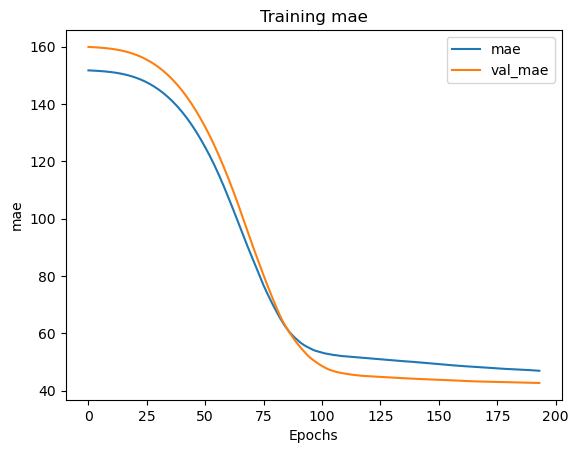

In [10]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training mae')
plt.legend(['mae', 'val_mae'])
plt.xlabel('Epochs')
plt.ylabel('mae')